In [69]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input


In [71]:
count = 0
# Ganti 'Images/' dengan rute absolut direktori
base_path = r'C:\Users\Lenovo\COBA\Ekspresi'

# List semua subdirektori
dirs = os.listdir(base_path)

for dir in dirs:
    # Menggabungkan rute untuk subdirektori
    dir_path = os.path.join(base_path, dir)
    
    # Memastikan hanya direktori yang diproses
    if os.path.isdir(dir_path):
        files = os.listdir(dir_path)
        print(dir + ' Folder has ' + str(len(files)) + ' Images')
        count += len(files)

print('Images Folder has ' + str(count) + ' Images')


marah Folder has 360 Images
sedih Folder has 366 Images
senang Folder has 378 Images
Images Folder has 1104 Images


In [73]:
base_dir = r'C:\Users\Lenovo\COBA\Ekspresi'
img_size = 180
batch = 32

In [75]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 1104 files belonging to 3 classes.
Using 884 files for training.
Found 1104 files belonging to 3 classes.
Using 220 files for validation.


In [14]:
expression_names = train_ds.class_names
expression_names

['marah', 'sedih', 'senang']

In [16]:
import matplotlib.pyplot as plt

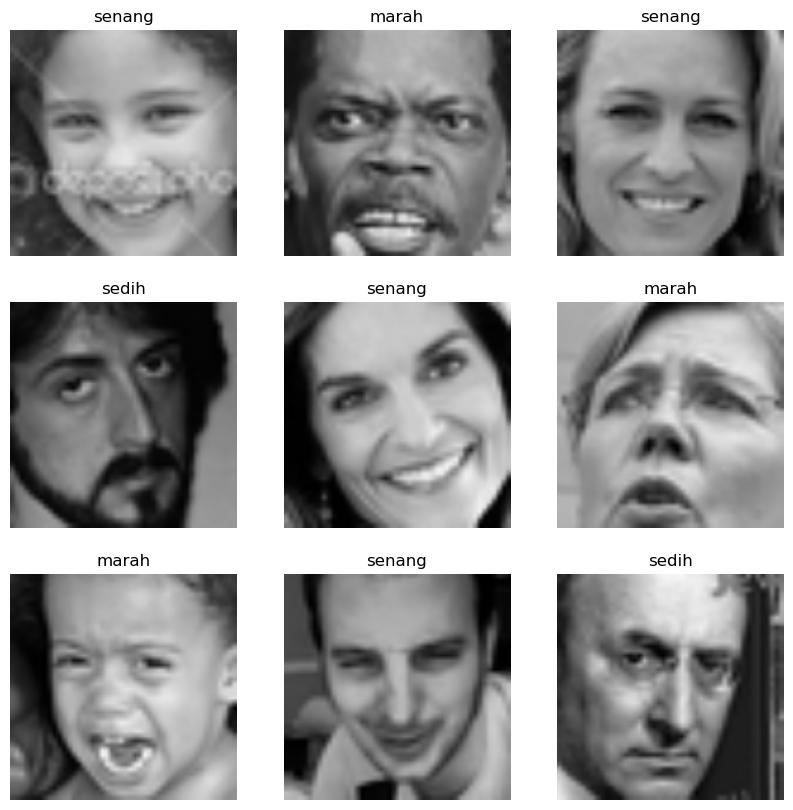

In [18]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(expression_names[labels[i]])
        plt.axis('off')

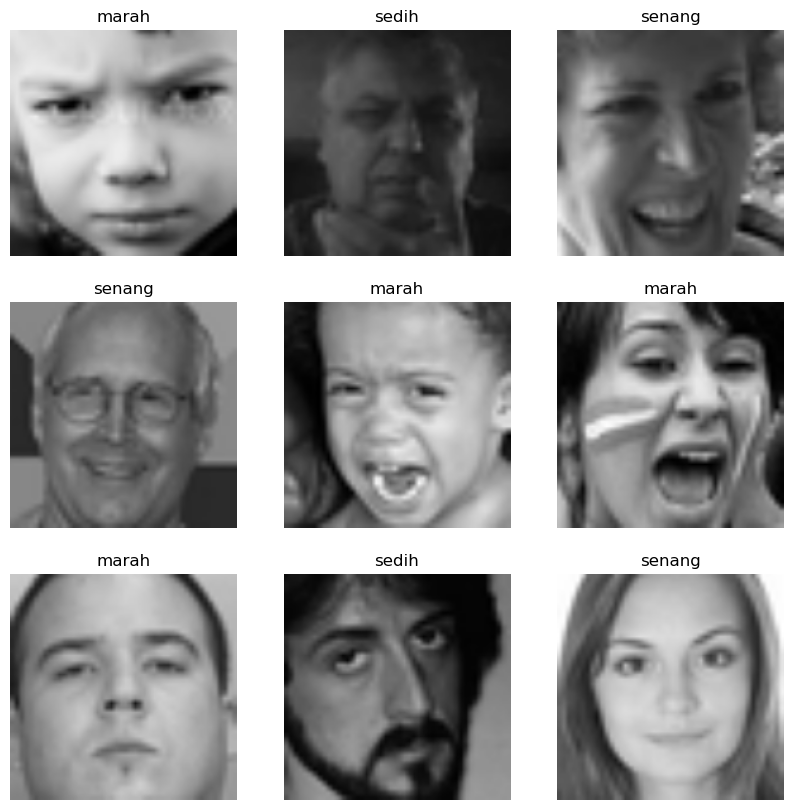

In [16]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(ekspresi_names[labels[i]])
        plt.axis('off')

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

In [24]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [26]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [28]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


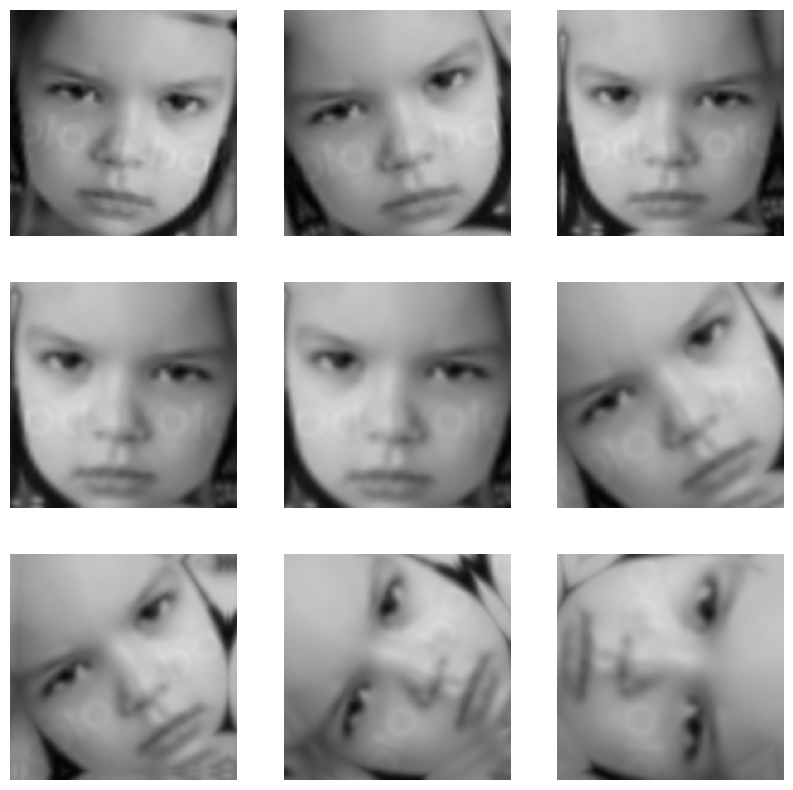

In [30]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [32]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.2802 - loss: 1.6326 - val_accuracy: 0.3182 - val_loss: 1.1451
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - accuracy: 0.3340 - loss: 1.1340 - val_accuracy: 0.3682 - val_loss: 1.1175
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.3690 - loss: 1.1181 - val_accuracy: 0.4136 - val_loss: 1.0912
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.3752 - loss: 1.0887 - val_accuracy: 0.4545 - val_loss: 1.0613
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - accuracy: 0.3706 - loss: 1.0993 - val_accuracy: 0.3818 - val_loss: 1.0785
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.3712 - loss: 1.0971 - val_accuracy: 0.4818 - val_loss: 1.0225
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.4382 - loss: 1.0601 - val_accuracy: 0.4545 - val_loss: 1.0533
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.4014 - loss: 1.0700 - val_accuracy: 0.

In [40]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + expression_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome.jpg

In [44]:
image_path = r'C:\Users\Lenovo\COBA\Ekspresi\marah\im0'

In [50]:
model.save('Face_Recog_Model.keras')

In [52]:
model = tf.keras.models.load_model('Face_Recog_Model.keras')


In [54]:
model.save('Face_Recog_Model.h5')